In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("TSLA.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
1,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
2,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
3,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
4,2010-07-07,3.280000,3.326000,2.996000,3.160000,3.160000,34608500
...,...,...,...,...,...,...,...
2574,2020-09-21,453.130005,455.679993,407.070007,449.390015,449.390015,109476800
2575,2020-09-22,429.600006,437.760010,417.600006,424.230011,424.230011,79580800
2576,2020-09-23,405.160004,412.149994,375.880005,380.359985,380.359985,95074200
2577,2020-09-24,363.799988,399.500000,351.299988,387.790009,387.790009,96561100


In [3]:
df.shape

(2579, 7)

In [4]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2.579000e+03
mean,49.206686,50.301806,48.073117,49.253279,49.253279,3.078217e+07
std,57.934102,59.888383,55.852349,58.119783,58.119783,2.855717e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,7.159000,7.268000,6.989000,7.153000,7.153000,1.047400e+07
50%,44.001999,44.660000,43.301998,43.924000,43.924000,2.413100e+07
75%,59.339000,60.171000,57.841000,59.020000,59.020000,3.979150e+07
max,502.140015,502.489990,470.510010,498.320007,498.320007,3.046940e+08


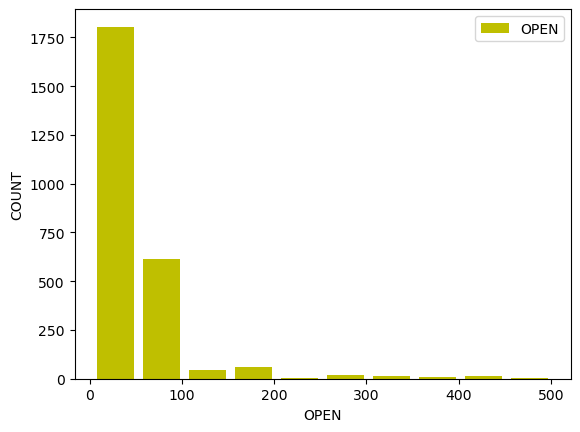

In [6]:
plt.hist(df["Open"], rwidth= 0.8, color ="y", label= "OPEN")
plt.xlabel("OPEN")
plt.ylabel("COUNT")
plt.legend()
plt.show()

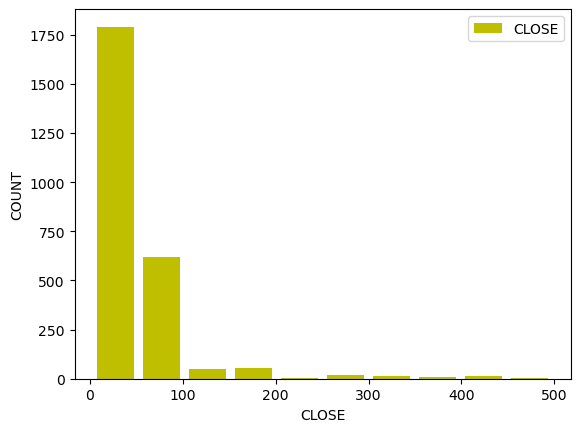

In [7]:
plt.hist(df["Close"], rwidth= 0.8, color ="y", label= "CLOSE")
plt.xlabel("CLOSE")
plt.ylabel("COUNT")
plt.legend()
plt.show()

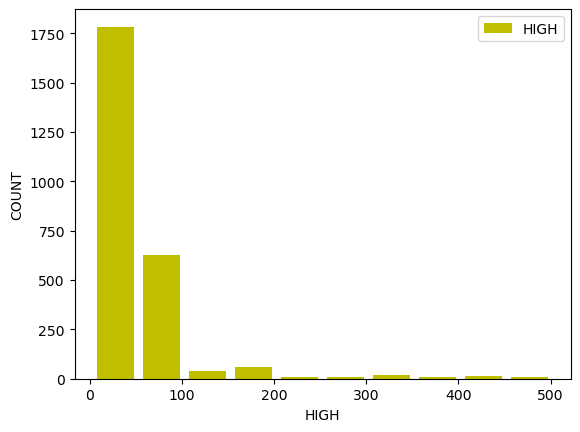

In [8]:
plt.hist(df["High"], rwidth= 0.8, color ="y", label= "HIGH")
plt.xlabel("HIGH")
plt.ylabel("COUNT")
plt.legend()
plt.show()

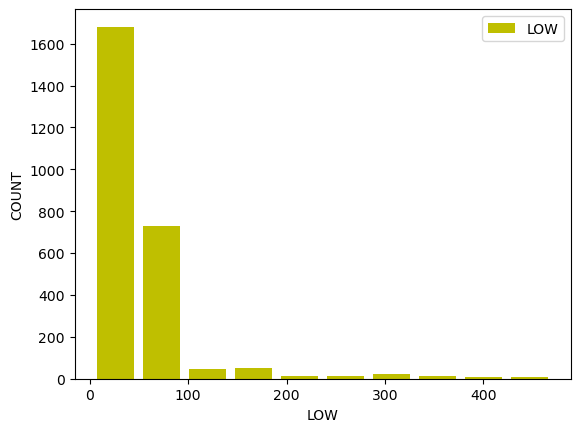

In [9]:
plt.hist(df["Low"], rwidth= 0.8, color ="y", label= "LOW")
plt.xlabel("LOW")
plt.ylabel("COUNT")
plt.legend()
plt.show()

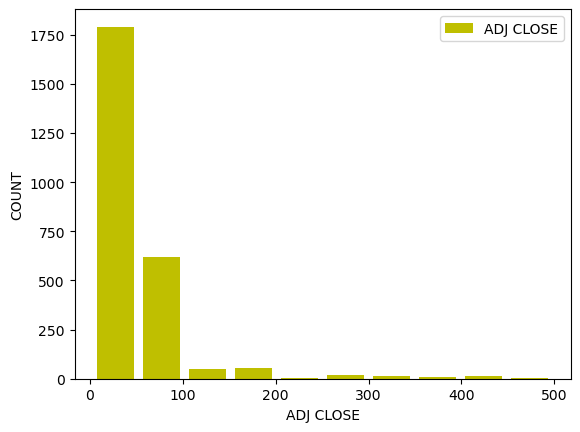

In [10]:
plt.hist(df["Adj Close"], rwidth= 0.8, color ="y", label= "ADJ CLOSE")
plt.xlabel("ADJ CLOSE")
plt.ylabel("COUNT")
plt.legend()
plt.show()

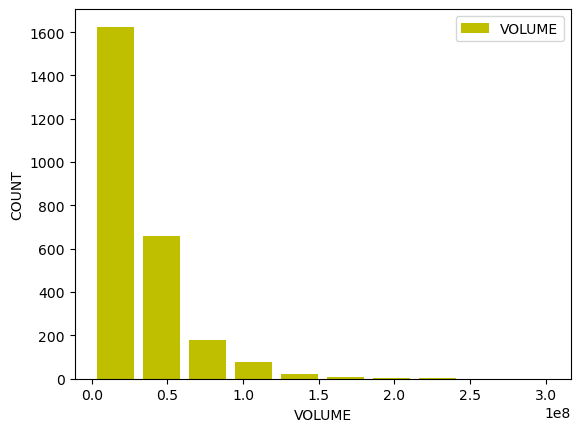

In [11]:
plt.hist(df["Volume"], rwidth= 0.8, color ="y", label= "VOLUME")
plt.xlabel("VOLUME")
plt.ylabel("COUNT")
plt.legend()
plt.show()

Text(0, 0.5, 'CLOSE')

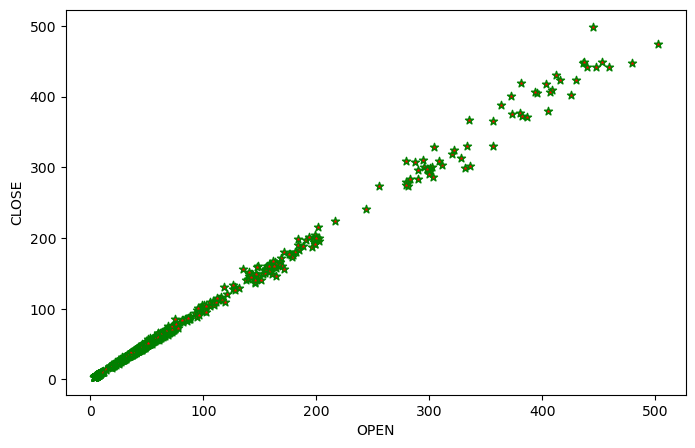

In [12]:
x = df["Open"]
y = df["Close"]
plt.figure(figsize = (8, 5))
plt.scatter(x, y, c = "r", marker = "*", edgecolors = 'g')
plt.xlabel("OPEN")
plt.ylabel("CLOSE")

Text(0, 0.5, 'LOW')

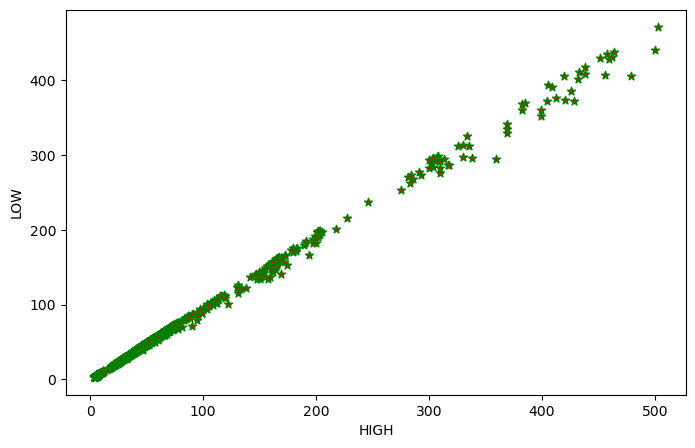

In [13]:
x = df["High"]
y = df["Low"]
plt.figure(figsize = (8, 5))
plt.scatter(x, y, c = "r", marker = "*", edgecolors = 'g')
plt.xlabel("HIGH")
plt.ylabel("LOW")

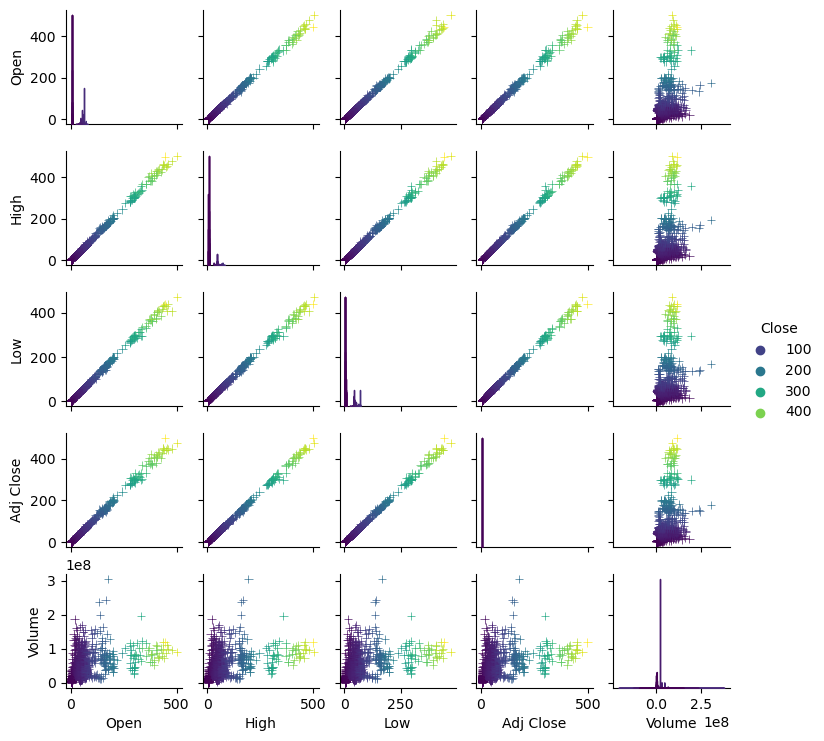

In [14]:
sns.pairplot(df, markers= "+", height = 1.5, hue = "Close",palette = "viridis")
plt.show()

In [15]:
df1 = df.copy()

In [16]:
df1 = df1.drop(['Date'], axis=1)
df1

,Open,High,Low,Close,Adj Close,Volume
0,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
1,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
2,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
3,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
4,3.280000,3.326000,2.996000,3.160000,3.160000,34608500
...,...,...,...,...,...,...
2574,453.130005,455.679993,407.070007,449.390015,449.390015,109476800
2575,429.600006,437.760010,417.600006,424.230011,424.230011,79580800
2576,405.160004,412.149994,375.880005,380.359985,380.359985,95074200
2577,363.799988,399.500000,351.299988,387.790009,387.790009,96561100


In [17]:
X = df1[['Open','High', 'Low', 'Volume']]
y = df1['Close']

In [18]:
X.head()

,Open,High,Low,Volume
0,5.158,6.084,4.660,85935500
1,5.000,5.184,4.054,41094000
2,4.600,4.620,3.742,25699000
3,4.000,4.000,3.166,34334500
4,3.280,3.326,2.996,34608500


In [19]:
y.head()

0    4.766
1    4.392
2    3.840
3    3.222
4    3.160
Name: Close, dtype: float64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state = 42)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2063, 4), (516, 4), (2063,), (516,))

In [22]:
X_train.head()

,Open,High,Low,Volume
1710,60.540001,60.799999,59.736000,20693500
2050,62.122002,64.958000,61.799999,65861000
2190,58.490002,59.077999,57.658001,35517000
361,6.566000,6.738000,6.480000,4014000
2023,63.116001,63.916000,61.849998,29349000


In [23]:
X_test.head()

,Open,High,Low,Volume
809,33.015999,33.683998,32.672001,27484500
2355,63.599998,65.344002,62.900002,39704500
761,24.638000,24.650000,24.158001,28000500
318,4.990000,5.000000,4.650000,5116000
961,40.400002,41.340000,39.529999,34983500


In [24]:
y_train.head()

1710    60.287998
2050    64.379997
2190    57.992001
361      6.660000
2023    63.773998
Name: Close, dtype: float64

In [25]:
y_test.head()

809     33.245998
2355    65.316002
761     24.454000
318      4.746000
961     39.970001
Name: Close, dtype: float64

In [26]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [27]:
lin_reg.coef_

array([-4.74258801e-01,  8.90151284e-01,  5.80056026e-01, -7.61635542e-09])

In [28]:
lin_reg.intercept_

0.16560487146895753

In [29]:
y_pred = lin_reg.predict(X_test)
y_pred

array([ 33.2335902 ,  64.351915  ,  24.22277799,   4.90810512,
        40.46756982, 350.03330436, 163.91929332,  51.5497623 ,
        41.73388679,  62.14690986,  89.21972539,  56.11086108,
        74.3167753 ,  44.39107147,  43.91630071,   5.79981938,
         4.6882713 ,  54.09828386,  50.92143113,  44.87899389,
         6.5649743 ,  43.54299597, 130.83410177,   8.26636152,
        41.29081457, 299.57437879,   4.28430263,   4.30866839,
        38.05783253,  35.70378336,  20.19939528,  46.75428525,
        61.75203342,  39.00734557,   4.62629252,  23.58516278,
         6.93691359,  46.35989729,   4.2430323 ,  39.89575619,
         5.62095305,   7.14166682,   4.92160558,  59.62482314,
        63.76199375,  43.79477215,  66.85837776,  44.6666087 ,
         7.76351488,  62.91421593,   8.04218617,  43.10999804,
        39.12517096,  54.41039071,  45.95834173,   5.45290505,
        45.87136289, 300.03536997,  49.06103665,  63.08020353,
        97.11452662,  74.69144298,   4.26966591,   6.40

In [30]:
cmp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
cmp.head(20)

,Actual,Predicted
809,33.245998,33.233590
2355,65.316002,64.351915
761,24.454000,24.222778
318,4.746000,4.908105
961,39.970001,40.467570
2565,330.209991,350.033304
2492,163.774002,163.919293
1688,51.146000,51.549762
1510,42.037998,41.733887
2048,61.099998,62.146910


In [31]:
lin_reg.predict(X_test)

array([ 33.2335902 ,  64.351915  ,  24.22277799,   4.90810512,
        40.46756982, 350.03330436, 163.91929332,  51.5497623 ,
        41.73388679,  62.14690986,  89.21972539,  56.11086108,
        74.3167753 ,  44.39107147,  43.91630071,   5.79981938,
         4.6882713 ,  54.09828386,  50.92143113,  44.87899389,
         6.5649743 ,  43.54299597, 130.83410177,   8.26636152,
        41.29081457, 299.57437879,   4.28430263,   4.30866839,
        38.05783253,  35.70378336,  20.19939528,  46.75428525,
        61.75203342,  39.00734557,   4.62629252,  23.58516278,
         6.93691359,  46.35989729,   4.2430323 ,  39.89575619,
         5.62095305,   7.14166682,   4.92160558,  59.62482314,
        63.76199375,  43.79477215,  66.85837776,  44.6666087 ,
         7.76351488,  62.91421593,   8.04218617,  43.10999804,
        39.12517096,  54.41039071,  45.95834173,   5.45290505,
        45.87136289, 300.03536997,  49.06103665,  63.08020353,
        97.11452662,  74.69144298,   4.26966591,   6.40

In [32]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error =", mse)

Mean Squared Error = 1.7512491362578253


In [33]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error =", mae)

Mean Absolute Error = 0.4987911661475404


In [34]:
accuracy = lin_reg.score(X_test, y_test)
accuracy

0.9993801718532288

# Thank You 